# Rivers Flow Data

In [10]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt

import extreme_data as extr
import clef_algo as clf
import hill_estimator as hill
import peng_estimator as peng
import kappa_estimator as kap
import hydro_map as hm
import damex_algo as dmx
import generate_alphas as ga
import utilities as ut
import peng_estimator as pg
import kappa_estimator as kp

## Load data

In [2]:
X = np.load('data/hydro_data/raw_discharge.npy')
V = extr.rank_transformation(X)
n, d = V.shape

## Split train/test

In [116]:
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=1, test_size=.1, random_state=1)
ind_train, ind_test = list(rs.split(V))[0]
V_train = V[ind_train]
n_train = V_train.shape[0]
print 'nb train:', n_train
V_test = V[ind_test]
n_test = V_test.shape[0]
print 'nb test:', n_test

nb train: 441
nb test: 49


### Extreme points

In [117]:
R = 50
k = int(n_train/R - 1)
print 'k = ', k
print 'nb extreme points:', np.sum(np.sum(V > R, axis=1) > 1)
V_bin = 1.*(V > R)

V_bin_train = V_bin[ind_train]
V_bin_train = V_bin_train[np.sum(V_bin_train, axis=1) > 1]
print 'nb extreme train points:', np.sum(np.sum(V_train > R, axis=1) > 1)

V_bin_test = V_bin[ind_test]
V_bin_test = V_bin_test[np.sum(V_bin_test, axis=1) > 1]
print 'nb extreme test points:', np.sum(np.sum(V_test > R, axis=1) > 1)

k =  7
nb extreme points: 286
nb extreme train points: 258
nb extreme test points: 28


## CLEF

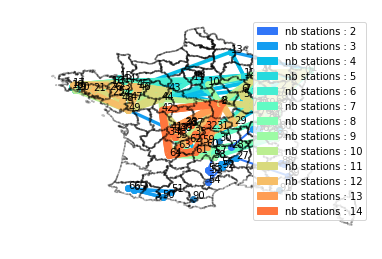

In [119]:
kappa_min = 0.4
faces_clf = clf.clef_0(V_bin_train, kappa_min)
hm.map_visualisation(faces_clf, d)

In [120]:
faces = ga.list_alphas_to_vect(faces_clf, d)
ind_2 = []
dist_2 = []
for v in V_bin_test:
    ind_2.append(np.argmin(ut.levenshtein_dist_mat(v, faces)))
    dist_2.append(np.min(ut.levenshtein_dist_mat(v, faces)))

In [ ]:
for i, ind in enumerate(ind_2):
    print 'new point:', list(np.nonzero(V_bin_test[i])[0])
    print 'distance:', dist_2[i]
    print 'closest face:', faces_clf[ind], '\n'

In [121]:
print np.sum(dist_2)/len(V_bin_test), len(faces_clf)

0.6275323030688968 84


In [ ]:
Rs = np.array([200, 400, 600, 800, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 6000])
Ds_2, Ns = ut.dist_levenshtein_Rs(faces_clf, d, Rs, V_test)
plt.plot(Ns, Ds_2)
plt.xlim(Ns[0], Ns[-1])
plt.show()

## Hill

2
3
4
5


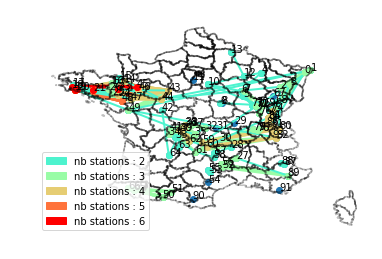

In [103]:
k = int(n_train/R - 1)
r_p = n_train/(k + int(k**(3./4)) + 1)
r_m = n_train/(k - int(k**(3./4)) + 1)
delta = 0.0005
# faces_2 = hill.alphas_init_hill(V_train, V_train > R, V_train > r_p, V_train > r_m, delta, k)
# print len(faces_2)
faces_hill = hill.hill_0(V_train, V_train > R, V_train > r_p, V_train > r_m, delta, k)
hm.map_visualisation(faces_hill, d)

In [111]:
faces = ga.list_alphas_to_vect(faces_hill, d)
ind_3 = []
dist_3 = []
for v in V_bin_test:
    ind_3.append(np.argmin(ut.levenshtein_dist_mat(v, faces)))
    dist_3.append(np.min(ut.levenshtein_dist_mat(v, faces)))

In [ ]:
for i, ind in enumerate(ind_3):
    print 'new point:', list(np.nonzero(V_bin_test[i])[0])
    print 'distance:', dist_3[i]
    print 'closest face:', faces_hill[ind], '\n'

In [112]:
print np.sum(dist_3)/len(V_bin_test), len(faces_hill)

0.6085954043876275 115


## DAMEX

In [ ]:
eps = 0.3
V_bin_dmx = 1.*(V_train[np.max(V_train, axis=1) > R] > R*eps)
V_bin_dmx = V_bin_dmx[np.sum(V_bin_dmx, axis=1) > 1]
faces_dmx, mass = dmx.damex_0(V_bin_dmx)
faces_dmx = faces_dmx[:np.sum(mass > 1)]
hm.map_visualisation(faces_dmx, d)

In [ ]:
faces = ga.list_alphas_to_vect(faces_dmx, d)
ind_4 = []
dist_4 = []
V_bin_dmx_test = 1.*(V_test[np.max(V_test, axis=1) > R] > R*eps)
V_bin_dmx_test = V_bin_dmx_test[np.sum(V_bin_dmx_test, axis=1) > 1]
for v in V_bin_dmx_test:
    ind_4.append(np.argmin(ut.levenshtein_dist_mat(v, faces)))
    dist_4.append(np.min(ut.levenshtein_dist_mat(v, faces)))

In [ ]:
for i, ind in enumerate(ind_4):
    print 'new point:', list(np.nonzero(V_bin_test[i])[0])
    print 'distance:', dist_4[i]
    print 'closest face:', faces_dmx[ind], '\n'

In [ ]:
print np.sum(dist_4)/len(V_bin_dmx_test), len(faces_dmx)

## Peng

2
3
4


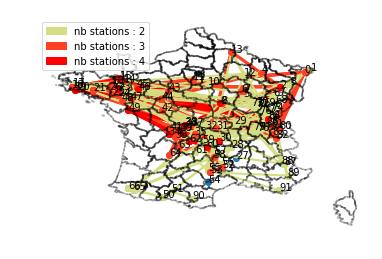

In [7]:
k = int(n_train/R - 1)
r_p = n_train/(k + int(k**(3./4)) + 1)
r_m = n_train/(k - int(k**(3./4)) + 1)
delta_p = 0.3
r_2 = n_train/(2*k + 1)
# faces_2 = pg.alphas_init_peng(V_train > R,
#                               V_train > r_2, V_train > r_p,
#                               V_train > r_m, delta_p, k)
# len(faces_2)
faces_peng = pg.peng_0(V_train > R,
                       V_train > r_2, V_train > r_p,
                       V_train > r_m, delta_p, k)
hm.map_visualisation(faces_peng, d)

In [8]:
print ut.dist_levenshtein_R(faces_peng, d, V_test, V_bin_test)

0.6687970740155208


2 : 328
3 : 752
4 : 1193
5 : 1308
6 : 997
7 : 529
8 : 189
9 : 41


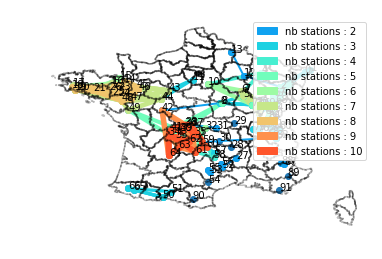

In [14]:
delta_k = 0.3
kappa_min = 0.2
faces_kapas = kp.kappa_as_0(V_train, V_train > R, V_train > r_p, V_train > r_m, delta_k, k, kappa_min)
hm.map_visualisation(faces_kapas, d)

In [15]:
print ut.dist_levenshtein_R(faces_kapas, d, V_test, V_bin_test)

0.5341990082067182
